In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

Models

In [100]:
def gauss(x, a, center, sigma, offset):
    return a * np.exp(-(x-center)**2/sigma**2) + offset
def twogauss(x, a1, center1, sigma1, offset1, a2, center2, sigma2, offset2):
    return gauss(x, a1, center1, sigma1, offset1) + gauss(x, a2, center2, sigma2, offset2)
def gausslinear(x, a, center, sigma, offset, slope, intercept):
    return gauss(x, a, center, sigma, offset) + slope * x + intercept
def twogausslinear(x, a, center, sigma, offset, a1, center1, sigma1, offset1, slope, intercept):
    return gausslinear(x, a, center, sigma, offset, slope, intercept) + gauss(x, a1, center1, sigma1, offset1)

#Single Gaussian Fit

In [34]:
number_of_events = 1000
bin_range = [-10, 10]
bin_width = 0.3

In [35]:
bins = np.arange(bin_range[0], bin_range[1], bin_width)
bin_mids = np.arange(bin_range[0], bin_range[1], bin_width) + bin_width/2.

In [69]:
line_strength = [0.4, 0.6]
line = np.random.randn(number_of_events*line_strength[0])
background = np.random.uniform(bin_range[0], bin_range[1], size=number_of_events*line_strength[1])
photons = np.append(line, background)

In [70]:
hist, bin_edges = np.histogram(photons, bins = bins)

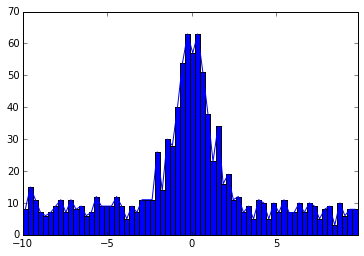

In [71]:
ydata = hist
xdata = bin_mids[:-1]
plt.bar(bin_edges[:-1], hist, width = bin_width);
plt.xlim(min(bin_edges), max(bin_edges));
plt.plot(bin_mids[:-1], hist)

## Fit

In [72]:
ydata = hist
xdata = bin_mids[:-1]
fit_guess = [1, 0, 1, 0, 1, 1]
popt, pcov = curve_fit(gausslinear, xdata, ydata, sigma=np.sqrt(ydata)+1, p0=fit_guess)

In [73]:
popt

array([  5.07269116e+01,   2.44597480e-02,  -1.42691635e+00,
         4.14966363e+02,  -8.54953992e-02,  -4.06930553e+02])

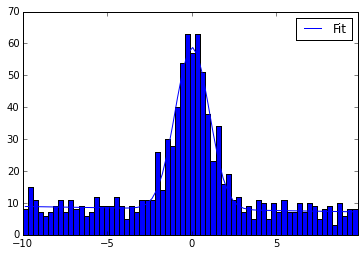

In [77]:
plt.bar(bin_edges[:-1], hist, width = bin_width);
plt.xlim(min(bin_edges), max(bin_edges));
plt.ylim(0)
#plt.plot(bin_mids[:-1], hist)
plt.plot(xdata, gausslinear(xdata, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]), label='Fit')
plt.legend()

In [75]:
perr = np.sqrt(np.diag(pcov))

In [76]:
perr

array([  2.87543297e+00,   5.30219604e-02,   7.19252050e-02,
         2.36600951e+07,   5.81707460e-02,   2.36600951e+07])

In [101]:
number_of_trials = 10000
centers = np.zeros(number_of_trials)
centers_errors = np.zeros(number_of_trials)

def random_gauss_fits(number_of_trials):
    
    line_strength = [0.4, 0.6]

    for i in np.arange(0, number_of_trials):
        line = np.random.randn(number_of_events*line_strength[0])
        background = np.random.uniform(bin_range[0], bin_range[1], size=number_of_events*line_strength[1])
        photons = np.append(line, background)
        hist, bin_edges = np.histogram(photons, bins = bins)
        fit_guess = [1, 0, 1, 0, 1, 1]
        popt, pcov = curve_fit(gausslinear, bin_mids[:-1], hist, sigma=np.sqrt(ydata)+1, p0=fit_guess)
        centers[i] = popt[1]
    return centers

In [102]:
centers = random_gauss_fits(number_of_trials)

## Distribution of Fit Centers

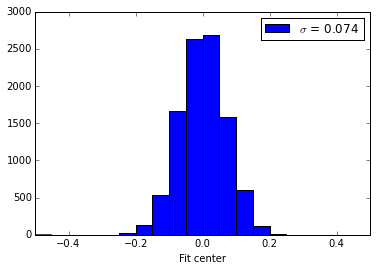

In [110]:
plt.hist(centers, bins=20, label='$\sigma$ = ' + "%0.3f" % centers.std(), range=[-0.5,0.5])
plt.xlabel("Fit center")
plt.xlim(-0.5, 0.5)
plt.legend()

# Two Gaussians

In [130]:
number_of_events = 1000
line_strength = np.array([0.4, 0.4, 0.2])
line_positions = [0, 10]
bin_range = [-10, 20]
bin_width = 0.3

In [131]:
bins = np.arange(bin_range[0], bin_range[1], bin_width)
bin_mids = np.arange(bin_range[0], bin_range[1], bin_width) + bin_width/2.

In [132]:
line1 = np.random.randn(number_of_events*line_strength[0]) + line_positions[0]
line2 = np.random.randn(number_of_events*line_strength[1]) + line_positions[1]
background = np.random.uniform(bin_range[0], bin_range[1], size=number_of_events*line_strength[2])
photons = np.append(line1, np.append(line2, background))

In [133]:
hist, bin_edges = np.histogram(photons, bins = bins)

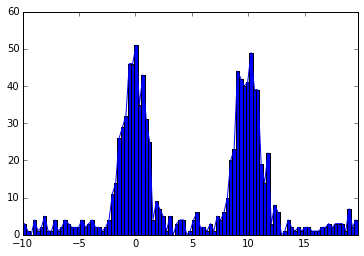

In [134]:
plt.bar(bin_edges[:-1], hist, width = bin_width);
plt.xlim(min(bin_edges), max(bin_edges));
plt.plot(bin_mids[:-1], hist)

In [10]:

popt, pcov = curve_fit(twogausslinear, xdata, ydata, sigma=np.sqrt(ydata)+1, p0=[1, 0, 1, 0, 1, 10, 1, 0])

In [11]:
popt

array([  9.50964076e+01,  -2.44937032e-02,   1.38935303e+00,
         7.99067997e+01,   2.59030560e+01,   1.00315649e+01,
         1.24359943e+00,  -7.99520670e+01])

In [12]:
pcov

array([[  6.11554534e+00,  -1.29398291e-03,  -3.47002223e-02,
          1.78619449e+04,   1.63665243e-03,   7.46230510e-06,
         -8.12015335e-04,  -1.78619393e+04],
       [ -1.29398294e-03,   5.10982021e-04,   2.03100396e-05,
          1.40794303e+03,   4.70732715e-06,   2.57796229e-08,
         -2.19259263e-06,  -1.40794302e+03],
       [ -3.47002223e-02,   2.03100384e-05,   6.02941493e-04,
          3.11669352e+03,  -7.98020166e-05,  -3.51174601e-07,
          4.00132563e-05,  -3.11669382e+03],
       [  1.78626616e+04,   1.40793974e+03,   3.11665515e+03,
         -3.78035305e+13,  -8.80817424e+03,  -1.60122181e+02,
          3.98058125e+02,   3.78035307e+13],
       [  1.63665261e-03,   4.70732710e-06,  -7.98020240e-05,
         -8.80819344e+03,   2.25888267e+00,   6.86695748e-03,
         -4.48027080e-02,   8.80819480e+03],
       [  7.46230819e-06,   2.57796131e-08,  -3.51174754e-07,
         -1.60122287e+02,   6.86695748e-03,   2.23965485e-03,
         -3.95895585e-04,   1.6

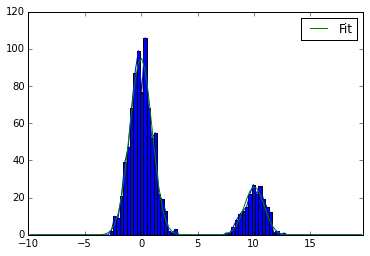

In [13]:
plt.bar(bin_edges[:-1], hist, width = bin_width);
plt.xlim(min(bin_edges), max(bin_edges));
plt.ylim(0)
plt.plot(bin_mids[:-1], hist)
plt.plot(xdata, func(xdata, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]), label='Fit')
plt.legend()

In [17]:
pcov

array([[  6.11554534e+00,  -1.29398291e-03,  -3.47002223e-02,
          1.78619449e+04,   1.63665243e-03,   7.46230510e-06,
         -8.12015335e-04,  -1.78619393e+04],
       [ -1.29398294e-03,   5.10982021e-04,   2.03100396e-05,
          1.40794303e+03,   4.70732715e-06,   2.57796229e-08,
         -2.19259263e-06,  -1.40794302e+03],
       [ -3.47002223e-02,   2.03100384e-05,   6.02941493e-04,
          3.11669352e+03,  -7.98020166e-05,  -3.51174601e-07,
          4.00132563e-05,  -3.11669382e+03],
       [  1.78626616e+04,   1.40793974e+03,   3.11665515e+03,
         -3.78035305e+13,  -8.80817424e+03,  -1.60122181e+02,
          3.98058125e+02,   3.78035307e+13],
       [  1.63665261e-03,   4.70732710e-06,  -7.98020240e-05,
         -8.80819344e+03,   2.25888267e+00,   6.86695748e-03,
         -4.48027080e-02,   8.80819480e+03],
       [  7.46230819e-06,   2.57796131e-08,  -3.51174754e-07,
         -1.60122287e+02,   6.86695748e-03,   2.23965485e-03,
         -3.95895585e-04,   1.6

In [14]:
perr = np.sqrt(np.diag(pcov))

/Users/schriste/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [15]:
perr

array([ 2.47296287,  0.02260491,  0.02455487,         nan,  1.50295797,
        0.04732499,  0.05259967,         nan])

In [16]:
x = 
plt.plot()

SyntaxError: invalid syntax (<ipython-input-16-ebb8e0862158>, line 1)